# Data Cleaning Exercise

Cleaning your data is crucial when starting a new data engineering project because it ensures the accuracy, consistency, and reliability of the dataset. Dirty data, which may include duplicates, missing values, and errors, can lead to incorrect analysis and insights, ultimately affecting the decision-making process. Data cleaning helps in identifying and rectifying these issues, providing a solid foundation for building effective data models and analytics. Additionally, clean data improves the performance of algorithms and enhances the overall efficiency of the project, leading to more trustworthy and actionable results.

Use Python, ```numpy```, ```pandas``` and/or ```matplotlib``` to analyse and clean your batch data:

## Import Libraries

In [44]:
# TODO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

Link to data source: https://www.kaggle.com/datasets/kunalgp/top-1000-most-played-spotify-songs-of-all-time

In [45]:
#
df = pd.read_csv('spotify_top_1000_tracks.csv')

## Understand the Data

View the first few rows, get summary statistics and check data types

In [46]:
# TODO
# Erste Übersicht
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   track_name    1000 non-null   object 
 1   artist        1000 non-null   object 
 2   album         1000 non-null   object 
 3   release_date  1000 non-null   object 
 4   popularity    1000 non-null   int64  
 5   spotify_url   1000 non-null   object 
 6   id            1000 non-null   object 
 7   duration_min  1000 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


,track_name,artist,album,release_date,popularity,spotify_url,id,duration_min
0,All The Stars (with SZA),Kendrick Lamar,Black Panther The Album Music From And Inspire...,2018-02-09,95,https://open.spotify.com/track/3GCdLUSnKSMJhs4...,3GCdLUSnKSMJhs4Tj6CV3s,3.869767
1,Starboy,The Weeknd,Starboy,2016-11-25,90,https://open.spotify.com/track/7MXVkk9YMctZqd1...,7MXVkk9YMctZqd1Srtv4MB,3.840883
2,Señorita,Shawn Mendes,Señorita,2019-06-21,80,https://open.spotify.com/track/0TK2YIli7K1leLo...,0TK2YIli7K1leLovkQiNik,3.182667
3,Heat Waves,Glass Animals,Dreamland,2020-08-07,87,https://open.spotify.com/track/3USxtqRwSYz57Ew...,3USxtqRwSYz57Ewm6wWRMp,3.980083
4,Let Me Love You,DJ Snake,Encore,2016-08-05,87,https://open.spotify.com/track/0lYBSQXN6rCTvUZ...,0lYBSQXN6rCTvUZvg9S0lU,3.432433


## Handle Missing Data

Identify missing values and fill or drop missing values

In [47]:
# TODO

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Drop rows with any missing values
df = df.dropna()

# Confirm removal
print("Remaining missing values:\n", df.isnull().sum())

Missing values per column:
 track_name      0
artist          0
album           0
release_date    0
popularity      0
spotify_url     0
id              0
duration_min    0
dtype: int64
Remaining missing values:
 track_name      0
artist          0
album           0
release_date    0
popularity      0
spotify_url     0
id              0
duration_min    0
dtype: int64


## Handle Duplicates

Identify duplicates and remove them

In [48]:
# TODO

# Identify duplicates based on 'track_name', 'artist', and 'album'
duplicates = df.duplicated(subset=['track_name', 'artist', 'album'], keep=False)
print("Number of duplicates:", duplicates.sum())
df[duplicates].head()

# Remove duplicates
df = df.drop_duplicates(subset=['track_name', 'artist', 'album'], keep='first')
print("Number of rows after removing duplicates:", len(df))


Number of duplicates: 26
Number of rows after removing duplicates: 987


## Handle Outliers

Identify outliers and remove or corret them

In [49]:
# TODO

# Define IQR-based outlier removal function
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

# Remove outliers in numerical columns
df = remove_outliers_iqr(df, 'popularity')
df = remove_outliers_iqr(df, 'duration_min')

print("Number of rows after removing outliers:", len(df))


Number of rows after removing outliers: 965


## Handle Incorrect Data Types

In [50]:
# TODO
import pandas as pd
df=pd.read_csv("spotify_cleaned.csv")
df['release_date']=pd.to_datetime(df['release_date'], errors='coerce')
print(df.dtypes)

track_name              object
artist                  object
album                   object
release_date    datetime64[ns]
popularity               int64
spotify_url             object
id                      object
duration_min           float64
dtype: object


## Visualize Data

Use graphes, plots and/or diagrams to visualize the data

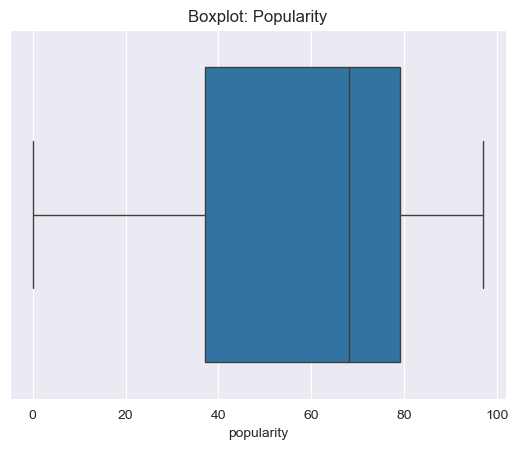

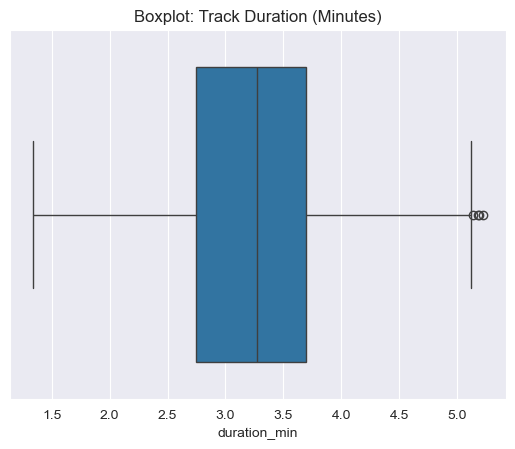

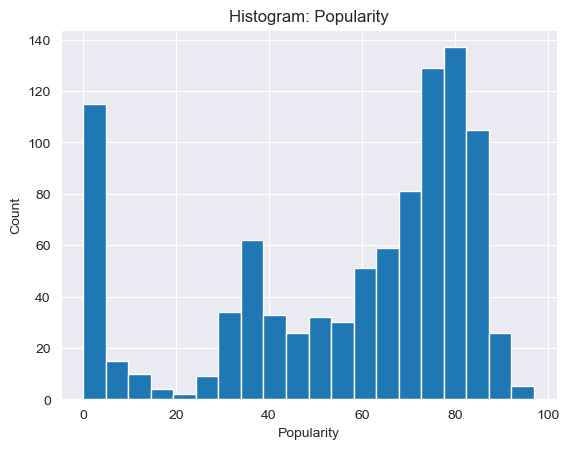

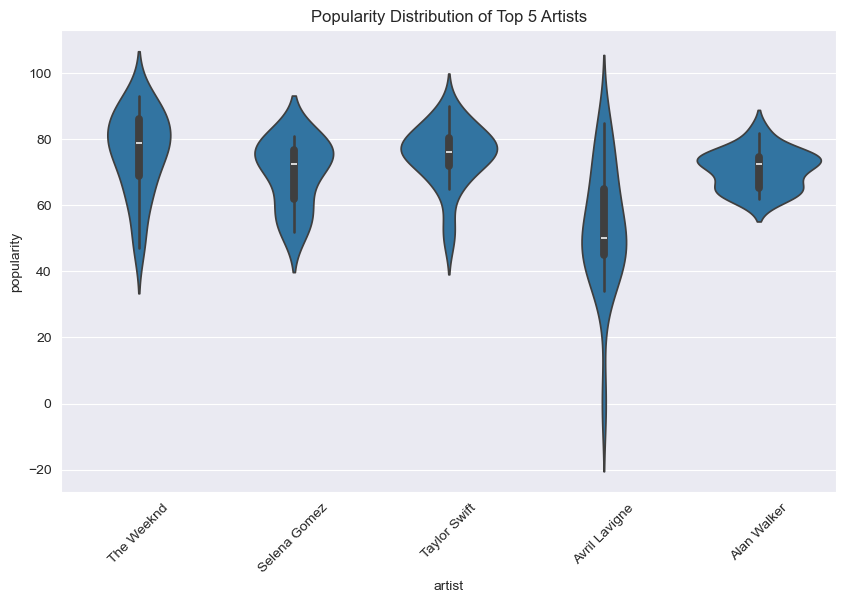

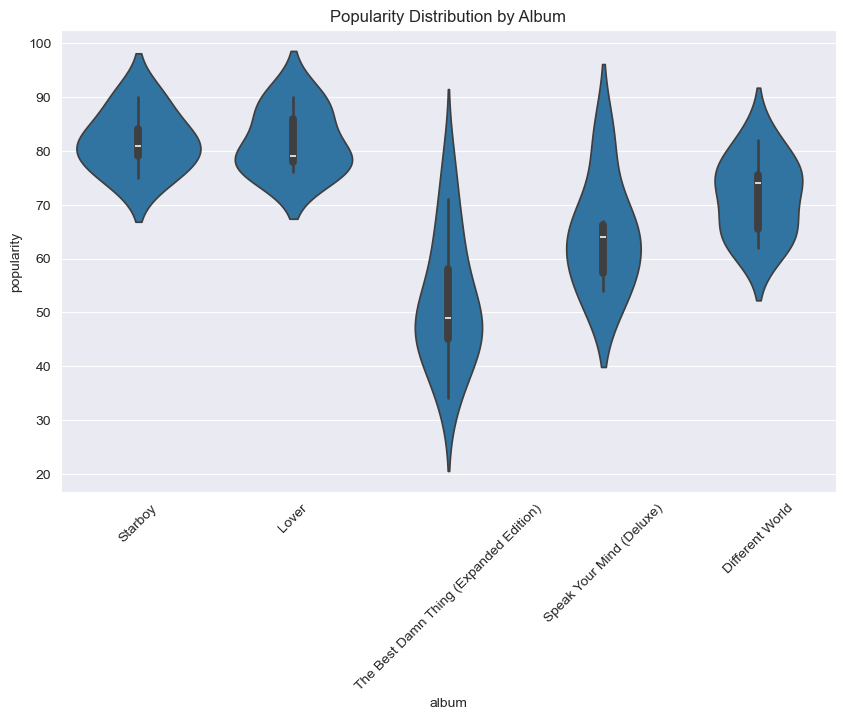

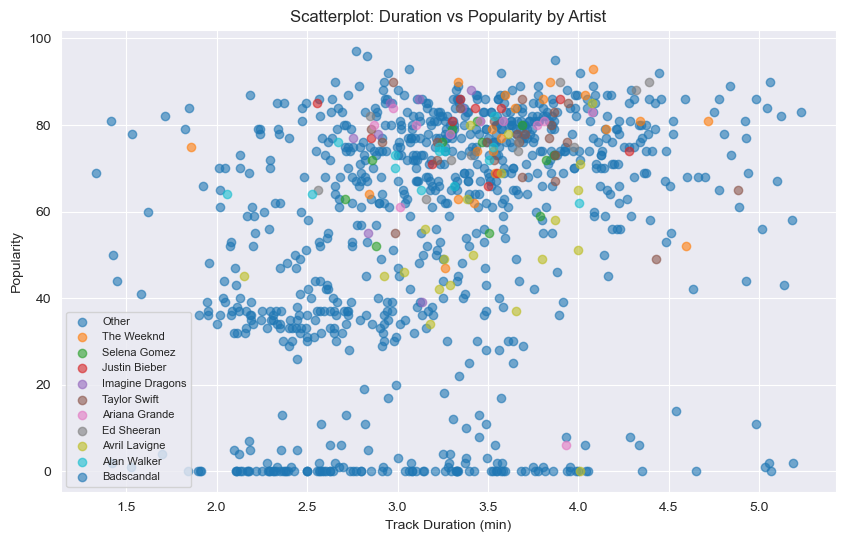

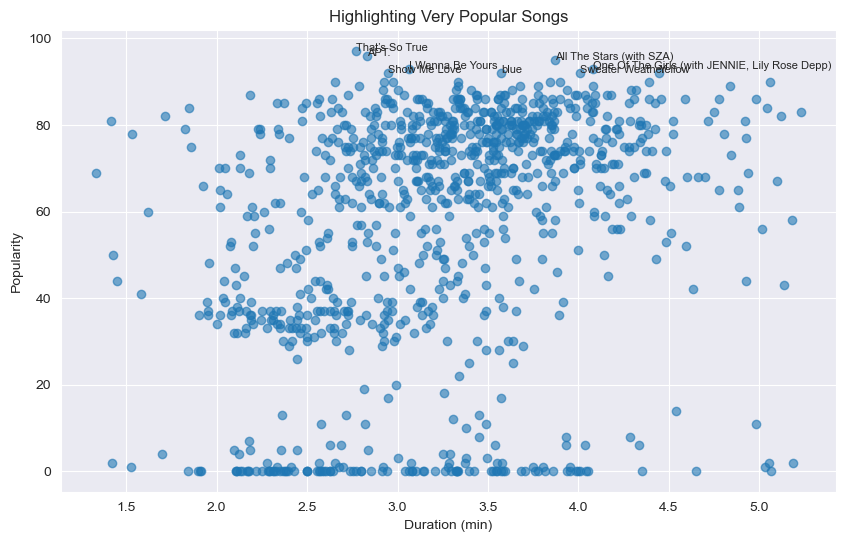

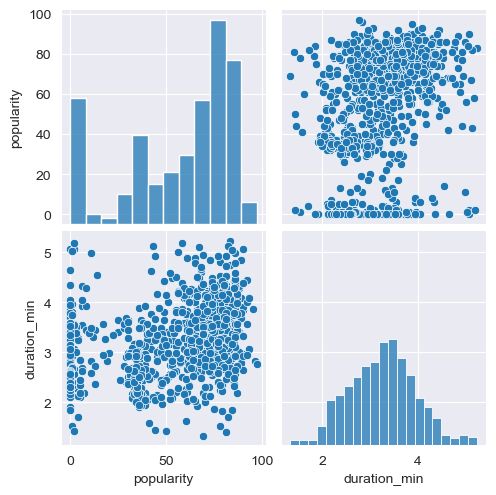

In [54]:
# TODO
import matplotlib.pyplot as plt
import seaborn as sns

# Popularity distribution
sns.boxplot(x=df['popularity'])
plt.title("Boxplot: Popularity")
plt.show()

# Duration distribution
sns.boxplot(x=df['duration_min'])
plt.title("Boxplot: Track Duration (Minutes)")
plt.show()

# Histogram of popularity
df['popularity'].hist(bins=20)
plt.title("Histogram: Popularity")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Nur Top 5 Künstler mit meisten Songs
top_artists = df['artist'].value_counts().nlargest(5).index
subset = df[df['artist'].isin(top_artists)]

plt.figure(figsize=(10, 6))
sns.violinplot(x='artist', y='popularity', data=subset)
plt.title("Popularity Distribution of Top 5 Artists")
plt.xticks(rotation=45)
plt.show()

top_albums = df['album'].value_counts().nlargest(5).index
subset = df[df['album'].isin(top_albums)]

plt.figure(figsize=(10, 6))
sns.violinplot(x='album', y='popularity', data=subset)
plt.title("Popularity Distribution by Album")
plt.xticks(rotation=45)
plt.show()

top_artists = df['artist'].value_counts().nlargest(10).index
df['top_artist'] = df['artist'].apply(lambda x: x if x in top_artists else "Other")

plt.figure(figsize=(10,6))
for artist in df['top_artist'].unique():
    sub = df[df['top_artist'] == artist]
    plt.scatter(sub['duration_min'], sub['popularity'], label=artist, alpha=0.6)

plt.xlabel("Track Duration (min)")
plt.ylabel("Popularity")
plt.title("Scatterplot: Duration vs Popularity by Artist")
plt.legend(loc="best", fontsize=8)
plt.grid(True)
plt.show()


plt.figure(figsize=(10,6))
plt.scatter(df['duration_min'], df['popularity'], alpha=0.6)


for _, row in df[df['popularity'] > 90].iterrows():
    plt.annotate(row['track_name'], (row['duration_min'], row['popularity']), fontsize=8)

plt.xlabel("Duration (min)")
plt.ylabel("Popularity")
plt.title("Highlighting Very Popular Songs")
plt.grid(True)
plt.show()

import seaborn as sns

sns.pairplot(df[['popularity', 'duration_min']])


## Save Cleaned Data

In [9]:
# TODO
# Save the cleaned dataset
df.to_csv('spotify_cleaned.csv', index=False)
print("Cleaned data saved to 'spotify_cleaned.csv'")


Cleaned data saved to 'spotify_cleaned.csv'
